## Set Up

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import seaborn as sns

In [2]:
# We import some libraries to load the dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import torchtext
from torchtext.data import get_tokenizer

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
!python -m spacy download en_core_web_sm


2023-07-22 21:13:04.227774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 21:13:05.866006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import en_core_web_sm
from spacy import displacy
from collections import Counter

In [5]:
# To use on Colab from drive. Put the Id (or Hash) of the sharing link of the data set
!gdown --id 1QE8Nof3D-xBCCnhQF1ddOmfXkWpT6wxN

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QE8Nof3D-xBCCnhQF1ddOmfXkWpT6wxN
To: /content/All_Beauty.json.gz
100% 47.4M/47.4M [00:00<00:00, 194MB/s]


# Data Cleaning

In [6]:
# Put the data in the following dictionary
data = []
with gzip.open('All_Beauty.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

371345
{'overall': 1.0, 'verified': True, 'reviewTime': '02 19, 2015', 'reviewerID': 'A1V6B6TNIC10QE', 'asin': '0143026860', 'reviewerName': 'theodore j bigham', 'reviewText': 'great', 'summary': 'One Star', 'unixReviewTime': 1424304000}


In [7]:
df = pd.DataFrame.from_dict(data)

print(len(df))

371345


In [8]:
print(df)

        overall  verified   reviewTime      reviewerID        asin  \
0           1.0      True  02 19, 2015  A1V6B6TNIC10QE  0143026860   
1           4.0      True  12 18, 2014  A2F5GHSXFQ0W6J  0143026860   
2           4.0      True  08 10, 2014  A1572GUYS7DGSR  0143026860   
3           5.0      True  03 11, 2013   A1PSGLFK1NSVO  0143026860   
4           5.0      True  12 25, 2011   A6IKXKZMTKGSC  0143026860   
...         ...       ...          ...             ...         ...   
371340      1.0      True  07 20, 2017  A202DCI7TV1022  B01HJEGTYK   
371341      5.0      True  03 16, 2017  A3FSOR5IJOFIBE  B01HJEGTYK   
371342      5.0      True   03 1, 2017  A1B5DK6CTP2P24  B01HJEGTYK   
371343      2.0      True  02 21, 2017  A23OUYS5IRMJS9  B01HJEGTYK   
371344      2.0      True  12 15, 2016  A24KQ9RVU81L87  B01HJEGTYK   

             reviewerName                                         reviewText  \
0       theodore j bigham                                              great   

In [9]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5.0,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5.0,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


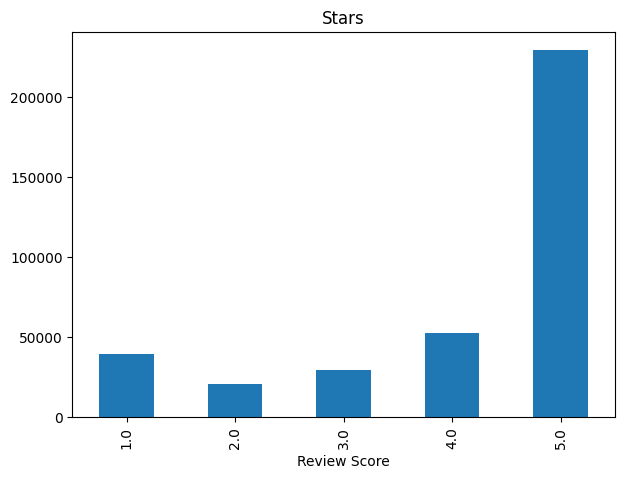

In [10]:
# Bar diagram of Overall
ax = df['overall'].value_counts().sort_index()\
    .plot(kind= 'bar',
    title = 'Stars',
    figsize=(7,5))
ax.set_xlabel('Review Score')
plt.show()

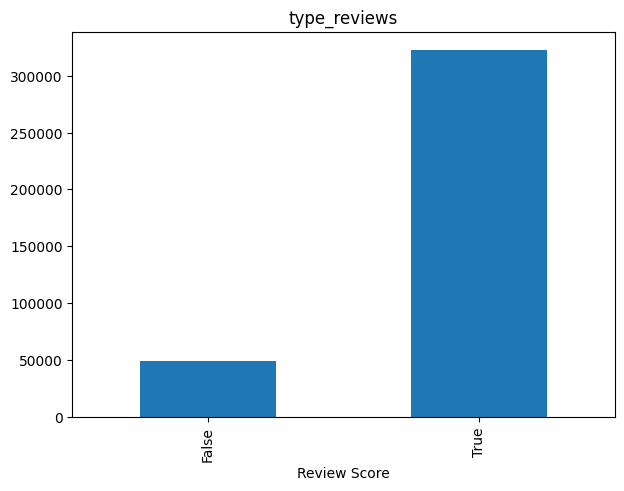

In [11]:
# Bar diagram of Verified
ax = df['verified'].value_counts().sort_index()\
    .plot(kind= 'bar',
    title = 'type_reviews',
    figsize=(7,5))
ax.set_xlabel('Review Score')
plt.show()

Without having eliminated fake reviews, the vast majority of reviews are positive with a ranking of 5, followed by a ranking of 4.

In [12]:
df.shape

(371345, 12)

In [13]:
df.dtypes

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object

In [14]:
amazon_re = df[['overall','reviewerID', 'asin', 'verified', 'reviewText']].copy()


In [15]:
amazon_re.head()

,overall,reviewerID,asin,verified,reviewText
0,1.0,A1V6B6TNIC10QE,0143026860,True,great
1,4.0,A2F5GHSXFQ0W6J,0143026860,True,My husband wanted to reading about the Negro ...
2,4.0,A1572GUYS7DGSR,0143026860,True,"This book was very informative, covering all a..."
3,5.0,A1PSGLFK1NSVO,0143026860,True,I am already a baseball fan and knew a bit abo...
4,5.0,A6IKXKZMTKGSC,0143026860,True,This was a good story of the Black leagues. I ...


In [16]:
amazon_re = amazon_re.loc[amazon_re['verified'] != False]


In [17]:
amazon_re.shape

(322473, 5)

In [18]:
amazon_re.head()

,overall,reviewerID,asin,verified,reviewText
0,1.0,A1V6B6TNIC10QE,0143026860,True,great
1,4.0,A2F5GHSXFQ0W6J,0143026860,True,My husband wanted to reading about the Negro ...
2,4.0,A1572GUYS7DGSR,0143026860,True,"This book was very informative, covering all a..."
3,5.0,A1PSGLFK1NSVO,0143026860,True,I am already a baseball fan and knew a bit abo...
4,5.0,A6IKXKZMTKGSC,0143026860,True,This was a good story of the Black leagues. I ...


In [19]:
amazon_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322473 entries, 0 to 371344
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     322473 non-null  float64
 1   reviewerID  322473 non-null  object 
 2   asin        322473 non-null  object 
 3   verified    322473 non-null  bool   
 4   reviewText  322098 non-null  object 
dtypes: bool(1), float64(1), object(3)
memory usage: 12.6+ MB


Deleting NULL

In [20]:
filas_con_nulos = amazon_re.isnull().any(axis=1)


In [21]:
cantidad_filas_con_nulos = filas_con_nulos.sum()
print("Cantidad de filas con valores nulos:", cantidad_filas_con_nulos)


Cantidad de filas con valores nulos: 375


In [22]:
# Remove the rows with NaN values
amazon_re = amazon_re.dropna()


In [23]:
filas_con_nulos = amazon_re.isnull().any(axis=1)
cantidad_filas_con_nulos = filas_con_nulos.sum()
print("Cantidad de filas con valores nulos:", cantidad_filas_con_nulos)

Cantidad de filas con valores nulos: 0


In [24]:
amazon_re.shape

(322098, 5)

In [25]:
amazon_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322098 entries, 0 to 371344
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     322098 non-null  float64
 1   reviewerID  322098 non-null  object 
 2   asin        322098 non-null  object 
 3   verified    322098 non-null  bool   
 4   reviewText  322098 non-null  object 
dtypes: bool(1), float64(1), object(3)
memory usage: 12.6+ MB


In [26]:
amazon_re.describe()['overall'].T

count    322098.000000
mean          4.113881
std           1.361587
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [27]:
amazon_re = amazon_re[['overall','reviewerID', 'asin', 'reviewText']].copy()


In [28]:
# X is a vector, each component is a review text
X = amazon_re.reviewText.values

# Changes values from [0,4] to [0,1]
# y = (amazon_re.overall.values > 1).astype(int) # Jimmy version
# Changes values from [1,5] to [0,1] with float
y = (amazon_re.overall.values -1)/4.0


# Split the data into train and test
x_train_text, x_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))
print(X.shape)
print(X[1])

0.7784706106070367
0.7784694194349581
(322098,)
My  husband wanted to reading about the Negro Baseball and this a great addition to his library
 Our library doesn't haveinformation so this book is his start. Tthank you


In [29]:
for s, l in zip(x_train_text[:10], y_train[:10]):
  print('{}: {}'.format(l, s))

1.0: Like all OZ products, this one is a winner too. You can feel the serum working within 2 minutes after application. After 5 days off use I can see a difference in the tone of skin-brighter, tighter, and a noticeable reduction of fine lines. Great product, great price=win win.
1.0: Love the smell, the thickness, the way it makes my skin feel and look. Also love the companion body wash. My new favorite brand!
1.0: Excellent
1.0: Good hold without making your hair too sticky/oily/flaky gross. Worth the premium price over gels and glues.
1.0: Absolutely impressed with the great quality and cheap price! I bought these for my niece since she had cut her hair too short for her 15th birthday and wanted to add length.  I bought the "curly" version.  They came in secure packaging, not at all tangled and nice and curly at the tips.  They feel and look real.  They looked amazing on my niece color blended well with her hair.  Highly recommend! adds length and some volume.
1.0: It has a great sm

Tokenization

# Functions. Cleaning stopwords

In [30]:
############
# Clean the arrays of words. I don't know which ones are stop words(?)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Some helper lists
stopwords_list = stopwords.words('english')
filters = ["\n\n", "'m", "'re", "'ve" "'s"] #Very special words
blacklist = stopwords_list + filters # Concatenate
whitelist = ["n't", "not", "no"]

# word is a stopword?
def is_stopword(word):
  # What about other rules?
  if (word not in blacklist or word in whitelist) and len(word) > 1:# and not boolean:
    return False
  else:
    return True

def remove_stopwords(l_words):
  '''Function for a list of list of words '''
  clean_words = [[word for word in words if not is_stopword(word)] for words in l_words]
  return clean_words

print(stopwords_list)
is_stopword("!")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# *Tokenization and 2nd cleaning*
Via spicy.

The tokenized list are called
*   tokenized_train_reviews
*   tokenized_test_reviews




In [31]:
nlp = spacy.load('en_core_web_sm')
type(nlp)

spacy.lang.en.English

In [32]:
# Tokenize function via nlp from spicy
# and clean by our previous function

def tokenize_and_clean(x_text):
  '''
  This function Tokenize review text data and returns
  a list of list of words (already splited and cleaned)
  '''
  tokenized_x = []
  for review in x_text:
    tokens = nlp(review)
    tokenized_x.append([token.text for token in tokens if not is_stopword(token.text)]) #Split
  # Convert training token list to Python list
  tokenized_x = list(tokenized_x)
  return tokenized_x

In [33]:
# Tokenize via nlp from spicy

# Tokenize training data (x_train_text)
tokenized_train_reviews = tokenize_and_clean(x_train_text[:100])

# Tokenize test data (x_test_text)
tokenized_test_reviews = tokenize_and_clean(x_test_text[:100])

print(tokenized_train_reviews[0:10])

[['Like', 'OZ', 'products', 'one', 'winner', 'You', 'feel', 'serum', 'working', 'within', 'minutes', 'application', 'After', 'days', 'use', 'see', 'difference', 'tone', 'skin', 'brighter', 'tighter', 'noticeable', 'reduction', 'fine', 'lines', 'Great', 'product', 'great', 'price', 'win', 'win'], ['Love', 'smell', 'thickness', 'way', 'makes', 'skin', 'feel', 'look', 'Also', 'love', 'companion', 'body', 'wash', 'My', 'new', 'favorite', 'brand'], ['Excellent'], ['Good', 'hold', 'without', 'making', 'hair', 'sticky', 'oily', 'flaky', 'gross', 'Worth', 'premium', 'price', 'gels', 'glues'], ['Absolutely', 'impressed', 'great', 'quality', 'cheap', 'price', 'bought', 'niece', 'since', 'cut', 'hair', 'short', '15th', 'birthday', 'wanted', 'add', 'length', 'bought', 'curly', 'version', 'They', 'came', 'secure', 'packaging', 'not', 'tangled', 'nice', 'curly', 'tips', 'They', 'feel', 'look', 'real', 'They', 'looked', 'amazing', 'niece', 'color', 'blended', 'well', 'hair', 'Highly', 'recommend', 'a

# Another way to tokenize
Via torchtext


The tokenized are called
*   x_train_token
*   x_test_token





In [34]:
# Define and try tokenize via torchtext.data
# Other way to tokenize

tokenizer = get_tokenizer("basic_english")

print('Before Tokenize: ', x_train_text[1])
print('After Tokenize: ', tokenizer(x_train_text[1]))

Before Tokenize:  Love the smell, the thickness, the way it makes my skin feel and look. Also love the companion body wash. My new favorite brand!
After Tokenize:  ['love', 'the', 'smell', ',', 'the', 'thickness', ',', 'the', 'way', 'it', 'makes', 'my', 'skin', 'feel', 'and', 'look', '.', 'also', 'love', 'the', 'companion', 'body', 'wash', '.', 'my', 'new', 'favorite', 'brand', '!']


In [35]:
# Tokenize via torchtext.data get_tokenizer
# and clean by remove_stopwords

x_train_token = [tokenizer(s) for s in tqdm(x_train_text)]
x_test_token = [tokenizer(s) for s in tqdm(x_test_text)]

x_train_token = remove_stopwords(x_train_token)
x_test_token = remove_stopwords(x_test_token)

print("\n",x_test_token[0])

100%|██████████| 64420/64420 [00:01<00:00, 42728.24it/s]



 ['good', 'brushes']


# Word Embedding

In [36]:
# Makes a dictionary of ['word': Num of repetitions]
words = Counter()
for s in x_train_token:
  for w in s:
    words[w] += 1

sorted_words = list(words.keys()) # Takes only the words
sorted_words.sort(key=lambda w: words[w], reverse=True) # Gives it an order

print(f"Number of different Tokens in our Dataset: {len(sorted_words)}")
print(sorted_words[:100])

Number of different Tokens in our Dataset: 72993
['not', 'product', 'great', 'use', 'love', 'like', 'good', 'hair', 'one', 'skin', 'well', 'really', 'would', 'works', 'get', 'used', 'using', 'time', 'no', 'much', 'nice', 'price', 'little', 'work', 'also', 'buy', 'color', 'even', 'bought', 'better', 'long', 'smell', 'day', 'best', 'recommend', 'years', 'first', 'face', 'quality', 'still', 'got', 'easy', 'water', 'brush', 'perfect', 'dry', 'way', 'feel', 'tried', 'clean', 'make', 'smells', 'razor', 'made', 'look', 'find', 'products', 'small', 'back', 'last', 'pretty', 'scent', 'every', 'need', 'makes', 'stuff', 'put', 'shave', 'bit', 'looks', 'could', 'happy', 'soap', 'see', 'two', 'try', 'definitely', 'soft', 'came', 'without', 'teeth', 'never', 'think', 'since', 'go', 'keep', 'lot', 'looking', 'oil', 'purchase', 'new', 'size', 'many', 'enough', 'old', 'natural', 'money', 'cream', 'found', 'far']


In [37]:
def match_words( words, dicty=sorted_words):
  matched = []
  for d_word in dicty:
    condition = any([word == d_word for word in words])
    matched += [1.0 if condition else 0.0]
  return matched

# Trying
print(len(sorted_words))
mw=match_words(sorted_words[:5])
print(len(mw))
print( mw[:10])

72993
72993
[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# Set the x vectors in a space of dictionary (sorted_words) lenght import time

import time
start_time = time.time()

x_train_1_0 = [match_words(words) for words in x_train_token]
x_test_1_0 = [match_words(words) for words in x_test_token]

end_time = time.time()
total_time = end_time - start_time

print("Total time", total_time, "seconds")

In [ ]:
# Saving in a file (because it takes a long time)

list_to_file = [x_train_1_0, x_test_1_0]

print(sum(x_train_1_0[1]))
print(sum(x_test_1_0[1]))

with open("X_train_test_BE.json", 'w') as X_file:
    # indent=2 is not needed but makes the file human-readable
    # if the data is nested
    json.dump(list_to_file, X_file, indent=2)

with open("X_train_test_BE.json", 'r') as f:
    X_train_test = json.load(f)
    x_train_1_0 = X_train_test[0]
    x_test_1_0 = X_train_test[1]

print(type(x_train_1_0))
print(sum(x_train_1_0[1]))
print(sum(x_test_1_0[1]))

# Drafts, Trash and más

In [ ]:
# This cell is only to test functions nlp

import time

sample_data = amazon_re['reviewText'][0:100]

start_time = time.time()

start_time = time.time()

tokenized_reviews = []
for review in sample_data:
    tokens = nlp(review) # A review tex, type <class 'spacy.tokens.doc.Doc'>
    tokenized_reviews.append([token.text for token in tokens if not is_stopword(token.text)]) # Split each Rv text

# Each component of tokenized_reviews is a "vector" of words. Already splitted.
for i in range(10):
  print(tokenized_reviews[20+i])



end_time = time.time()
total_time = end_time - start_time
print("Total tokenization time for 1000 data:", total_time, "seconds")

estimation_time = total_time * (400000 / 100)
print("Time estimate for 400,000 data:", estimation_time, "seconds")